In [1]:
##Importing Important Librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling 
from pandas_profiling import ProfileReport
import itertools
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [2]:
##We now load and save the data using the Pandas Library
data=pd.read_csv("./hmeq.csv")

In [3]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [4]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
data.shape

(5960, 13)

In [6]:
##Number of Enteries that are not NAN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
##Descriptive Stats
##Insight on the Distribution of the Data
##There are no anomalies in the data note the (maxi mums and means in each case)
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
##Looking at the Columns
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

### DISTRIBUTIONS OF VARIOUS VARIABLES

0    4771
1    1189
Name: BAD, dtype: int64


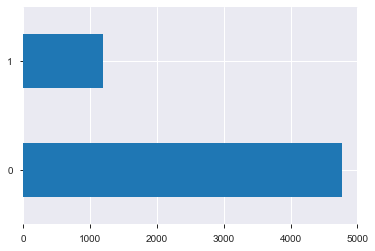

In [9]:
print(data["BAD"].value_counts())
data["BAD"].value_counts().plot("barh")

In [10]:
print(data["REASON"].value_counts())
##This is a nominal feature, it must be modified in a way to use it

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64


In [11]:
print(data["JOB"].value_counts())

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


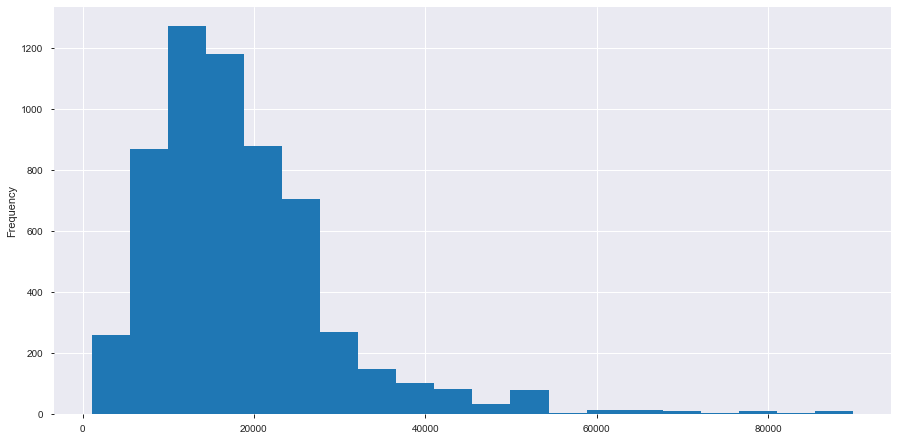

In [12]:
data["LOAN"].plot.hist(bins = 20,figsize=(15,7.5))
##Distribution of Loan Variable

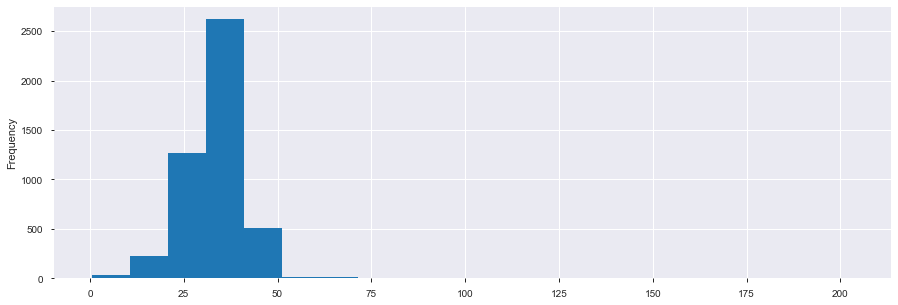

In [13]:
data["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))
##Highly populated btw 25-50

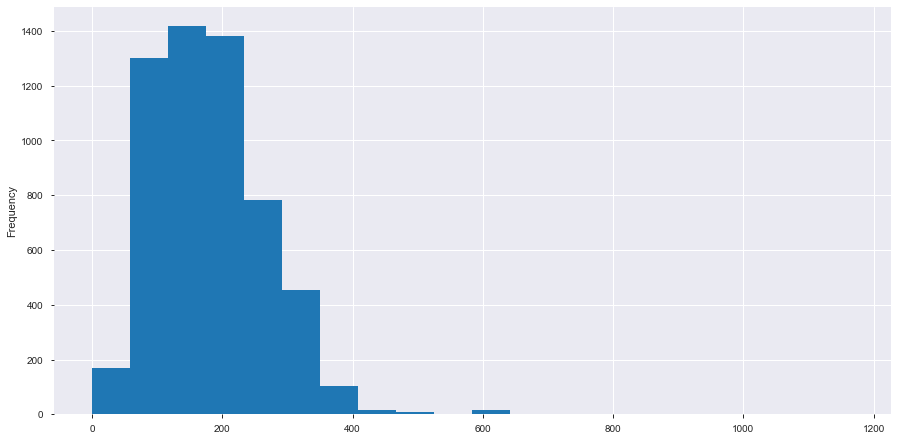

In [14]:
data["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))

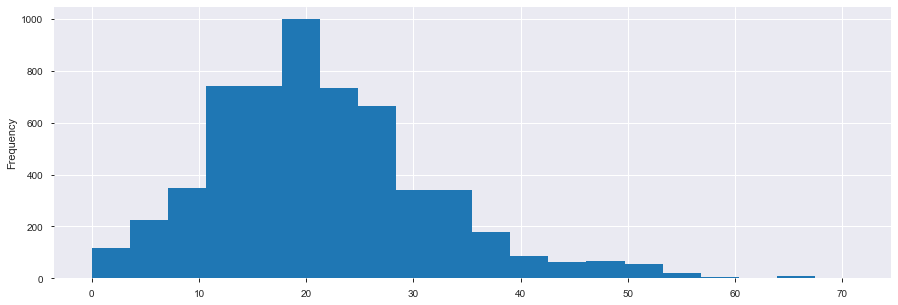

In [15]:
data["CLNO"].plot.hist(bins = 20,figsize=(15,5))

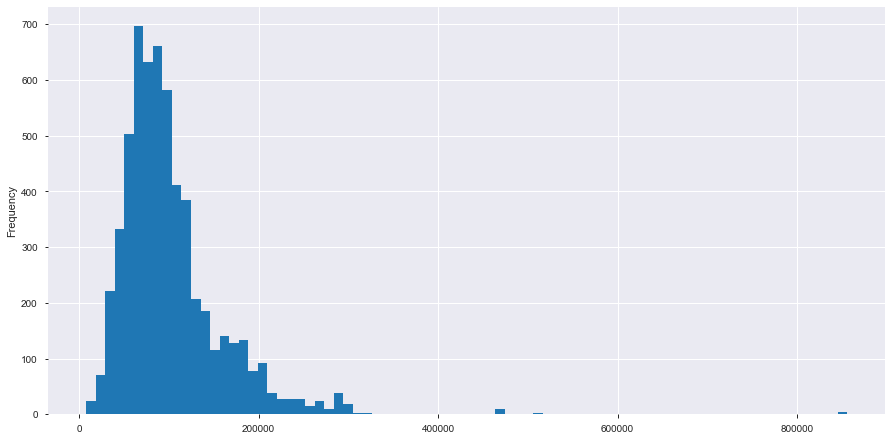

In [16]:
data["VALUE"].plot.hist(bins = 80,figsize=(15,7.5))

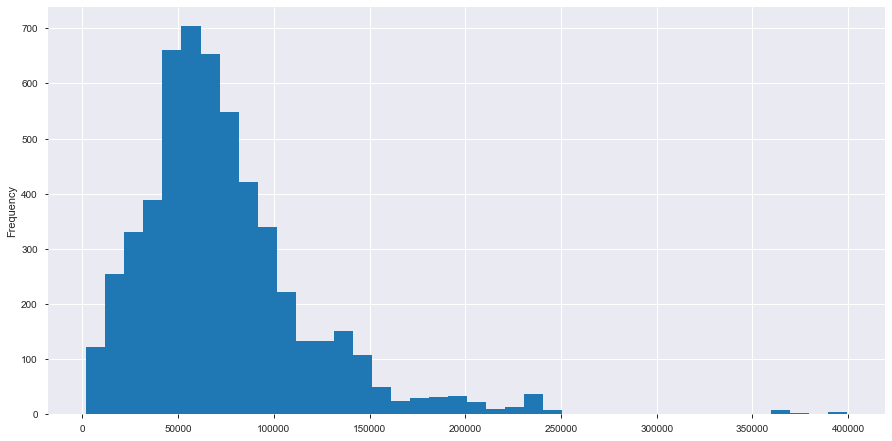

In [17]:
data["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))

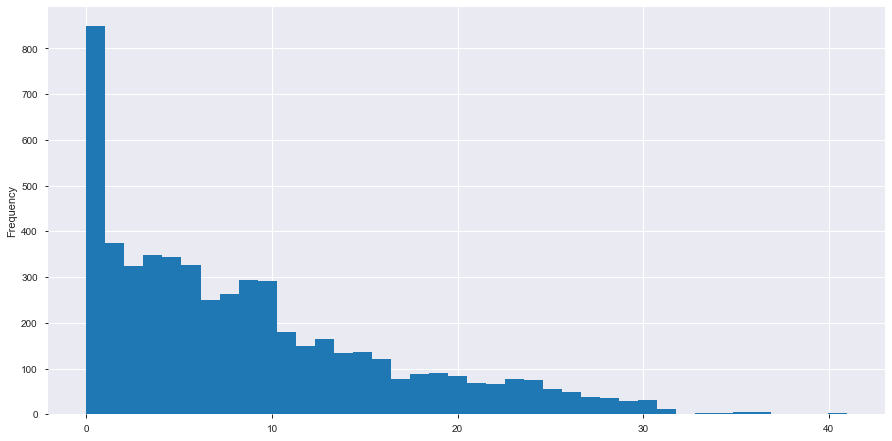

In [18]:
data["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

In [19]:
data["DEROG"].value_counts()

0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [20]:
data["DELINQ"].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

In [21]:
data["NINQ"].value_counts()

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

##IMPUTING THE INPUT VARIABLES

In [22]:
data.isnull().sum()
##Number of Cases with Nan

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [23]:
##Nominal Features
##Replacement using Majority Class
data["REASON"].fillna(value = "DebtCon", inplace = True)
data["JOB"].fillna(value = "Other", inplace = True)

In [24]:
data["DEROG"].fillna(value=0, inplace=True)
data["DELINQ"].fillna(value=0, inplace=True)

In [25]:
data.fillna(value=data.mean(),inplace=True)

In [26]:
data.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [27]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [31]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# removing the features BAD,JOB,REASON from the input features set
x_basic = data.drop(columns=["BAD","JOB","REASON"])
y = data["BAD"]

# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

# Training the basic logistic regression model with training set 
logreg_basic.fit(x_basic_tr,y_tr)

# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

intercept 
[-0.00020815]

coefficients 
[[-2.42491720e-05 -6.43927023e-06  2.14009934e-06 -3.38815366e-03
   4.06840762e-03  6.46653747e-03 -7.30774921e-03  4.61558012e-03
   5.16948027e-03  1.28382636e-02]]

accuracy score :  0.7925775292323335
f1 score :  0.44455026162066386
precision score :  0.5218415690269995
recall score :  0.5002706046080099


In [32]:
x_basic_tr

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5473,33000,232113.0000,46286.0,3.000000,0.0,1.0,214.352958,2.000000,50.000000,42.512000
1156,10000,31000.0000,58240.0,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
3544,18600,15243.0000,172611.0,25.000000,0.0,0.0,73.441539,2.000000,21.000000,29.095883
3289,17500,90221.0000,113564.0,19.000000,0.0,0.0,265.184625,1.000000,17.000000,27.029439
1277,10300,65382.0000,73817.0,1.000000,0.0,0.0,190.648145,1.000000,17.000000,34.192892
2544,15000,37624.0000,60562.0,8.922268,0.0,1.0,186.866667,7.000000,26.000000,33.779915
872,8800,67200.0000,80300.0,10.000000,4.0,1.0,135.866667,1.000000,33.000000,33.779915
898,8900,73760.8172,49147.0,8.922268,0.0,0.0,110.509581,1.186055,8.000000,37.108142
5188,28000,58002.0000,86427.0,9.000000,0.0,1.0,129.575352,2.000000,29.000000,39.362693
4204,21900,10421.0000,24808.0,8.922268,0.0,0.0,61.286698,2.000000,19.000000,40.016622


In [ ]:
# importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# removing the features BAD,JOB,REASON from the input features set
x_basic = data.drop(columns=["BAD","JOB","REASON"])
y = data["BAD"]

In [ ]:
# Spliting the data into test and train sets
x_basic_tr,x_basic_te,y_tr,y_te = train_test_split(x_basic,y,test_size =.33,random_state=1)
logreg_basic = LogisticRegression()

In [ ]:
# Training the basic logistic regression model with training set 
logreg_basic.fit(x_basic_tr,y_tr)

In [ ]:
# Printing the coefficients
print("intercept ")
print(logreg_basic.intercept_)
print("")
print("coefficients ")
print(logreg_basic.coef_)

In [ ]:
# Predicting the output of the test cases using the algorithm created above
y_pre = logreg_basic.predict(x_basic_te)

In [ ]:
# Validating the algorithm using various Performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("")
a1 = accuracy_score(y_te,y_pre)
f1 = f1_score(y_te, y_pre, average="macro")
p1 = precision_score(y_te, y_pre, average="macro")
r1 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

In [ ]:
# Visualize Numeric Variable Distributions
data.hist(figsize = (20, 20));

In [ ]:
profile = pandas_profiling.ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()